In [2]:
import math
from math import sqrt,log10, pow

from plot_intersections import plot_intersections, plot_segments


import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import pathlib
import tikzplotlib

from collections import defaultdict


In [3]:
def read_jsons(folders=[]):

    data = []
    # Read jsons files of build/semana03/circles with pathlib
    jsons = []
    for folder in folders:
        jsons += list(pathlib.Path(folder).glob("*.json"))
    
    jsons.sort()
    
    for json_file in jsons:
        print(json_file)
        with open(json_file, "r") as f:
            json_values = json.load(f)
            data.append(json_values)

    df = pd.DataFrame(data)
    df["case"] = df["container"] + "_" + df["event_container"]
    return df



In [4]:
dfs = []
df_pequenos = read_jsons(["../build/semana06/plot_01/"])
dfs.append(df_pequenos)

df_grandes = read_jsons(["../build/semana06/plot_big/"])
dfs.append(df_grandes)

df_grid = read_jsons(["../build/semana06/plot_grid/"])
dfs.append(df_grid)

df_random = read_jsons(["../build/semana06/plot_random_bkp/"])
dfs.append(df_random)

df = pd.concat(dfs)


../build/semana06/plot_01/nointersect_avl_list_1000000_1.json
../build/semana06/plot_01/nointersect_avl_list_1000000_2.json
../build/semana06/plot_01/nointersect_avl_list_1000000_3.json
../build/semana06/plot_01/nointersect_avl_list_100000_1.json
../build/semana06/plot_01/nointersect_avl_list_100000_2.json
../build/semana06/plot_01/nointersect_avl_list_100000_3.json
../build/semana06/plot_01/nointersect_avl_list_10000_1.json
../build/semana06/plot_01/nointersect_avl_list_10000_2.json
../build/semana06/plot_01/nointersect_avl_list_10000_3.json
../build/semana06/plot_01/nointersect_avl_list_1000_1.json
../build/semana06/plot_01/nointersect_avl_list_1000_2.json
../build/semana06/plot_01/nointersect_avl_list_1000_3.json
../build/semana06/plot_01/nointersect_avl_list_100_1.json
../build/semana06/plot_01/nointersect_avl_list_100_2.json
../build/semana06/plot_01/nointersect_avl_list_100_3.json
../build/semana06/plot_01/nointersect_avl_list_10_1.json
../build/semana06/plot_01/nointersect_avl_l

In [25]:
default_palette = sns.color_palette("Dark2")


sns.set_theme(style="whitegrid")
hue_categories = df.container.unique()  
hue_colors = {category: color for category, color in zip(hue_categories, default_palette)}


## Sem interseção pequenos
 
 


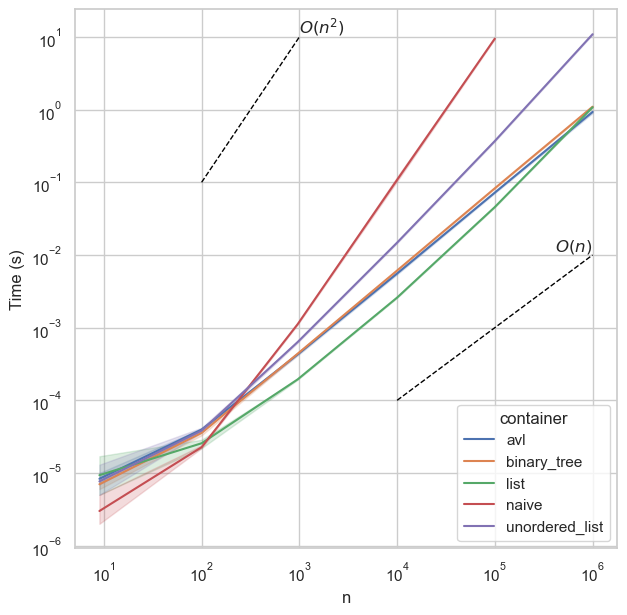

In [19]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.lineplot(data=df_pequenos, x="n", y="time", hue="container", ax=ax)

ax.set(xscale="log", yscale="log")
ax.set_ylabel("Time (s)")

y = 1e-1
xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*2)]


ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

y = 1e-4
xs = [10000, 1000000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*1)]

ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom", horizontalalignment="right")

plt.savefig("./tex/figs/tempos/plot_small_detection_time.pdf")
plt.show()


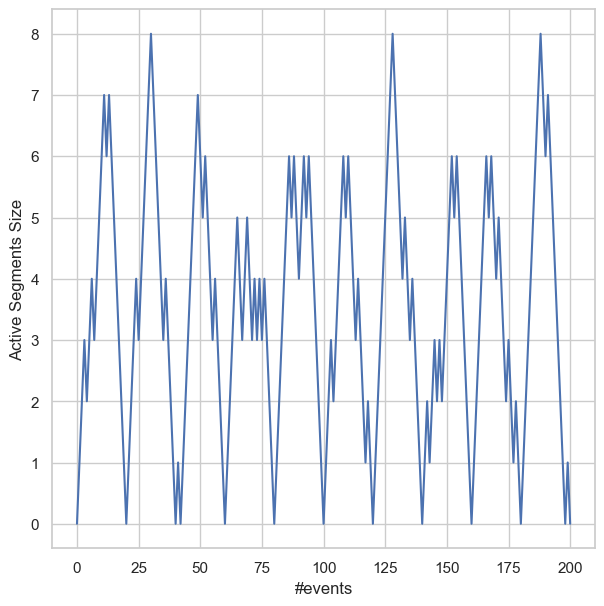

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
n = 100
ax.plot(df_pequenos[df_pequenos.n == n].iloc[0]['active_elements_size'])
ax.set_xlabel("#events")
ax.set_ylabel("Active Segments Size")

plt.savefig(f"./tex/figs/ativos/small_detection_segments_size_{n}.pdf", bbox_inches="tight")
plt.show()

## Segmentos grandes sem interseção

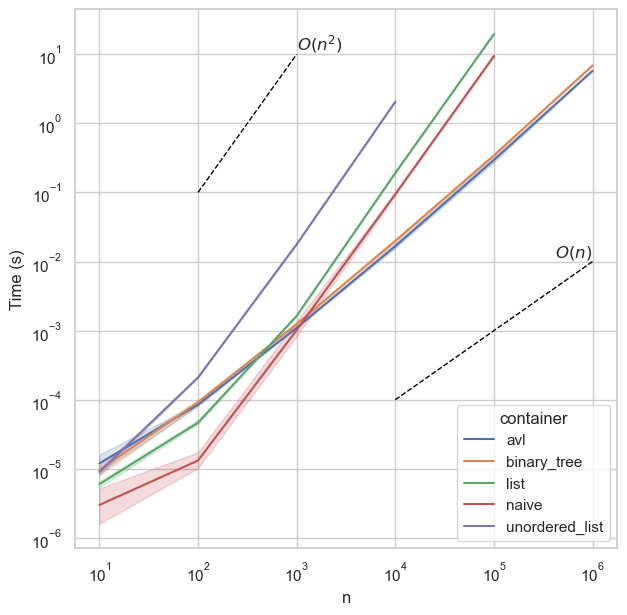

In [20]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.lineplot(data=df_grandes, x="n", y="time", hue="container", ax=ax)

ax.set(xscale="log", yscale="log")
ax.set_ylabel("Time (s)")

y = 1e-1
xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*2)]


ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

y = 1e-4
xs = [10000, 1000000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*1)]

ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom", horizontalalignment="right")

plt.savefig("./tex/figs/tempos/plot_big_detection_time.pdf")
plt.show()


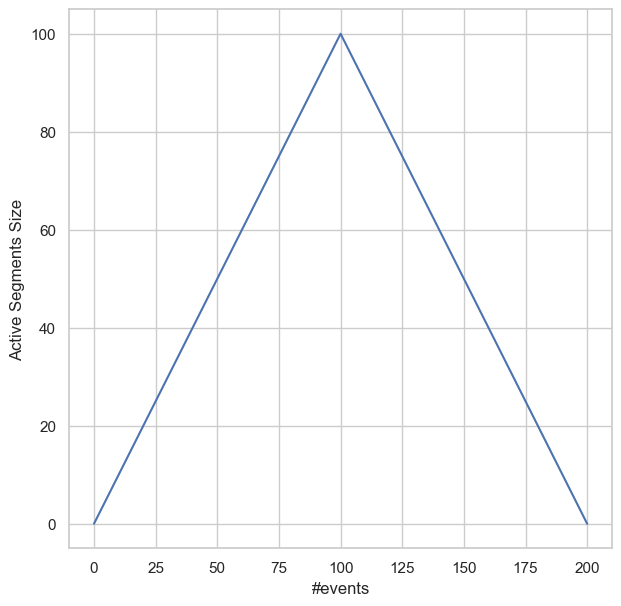

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
n = 100
ax.plot(df_grandes[df_grandes.n == n].iloc[0]['active_elements_size'])
ax.set_xlabel("#events")
ax.set_ylabel("Active Segments Size")

plt.savefig(f"./tex/figs/ativos/big_detection_segments_size_{n}.pdf", bbox_inches="tight")
plt.show()

## Grid Tests

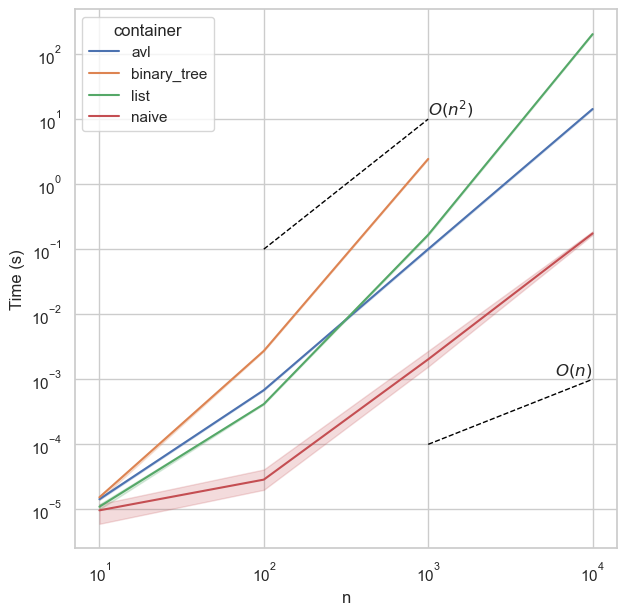

In [21]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.lineplot(data=df_grid[df_grid.event_container=="heap"], x="n", y="time", hue="container", ax=ax)

ax.set(xscale="log", yscale="log")
ax.set_ylabel("Time (s)")

y = 1e-1
xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*2)]

ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

y = 1e-4
xs = [1000, 10000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*1)]

ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom", horizontalalignment="right")

plt.savefig("./tex/figs/tempos/plot_grid_time.pdf")
plt.show()


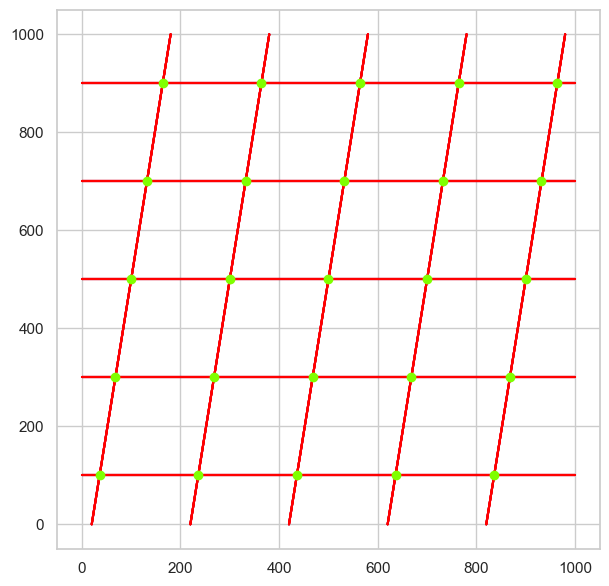

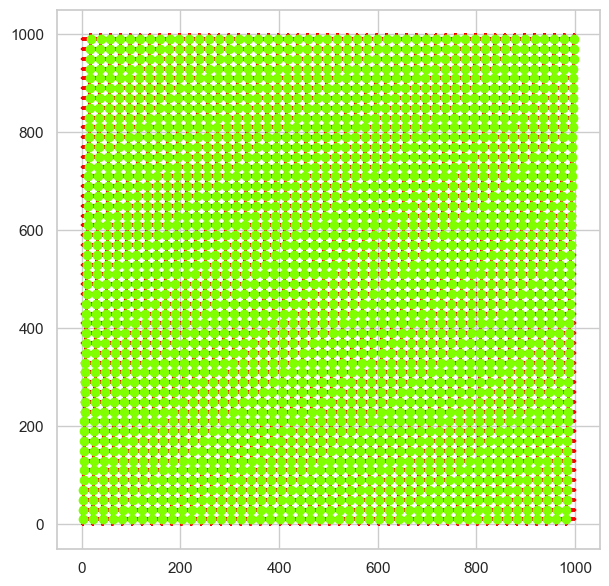

In [24]:

for n in [10, 100]:
    fig, ax = plt.subplots(1, 1, figsize=(7, 7))

    row = df_grid[(df_grid.n==n) & (df_grid.container=="avl")].iloc[2]

    plot_segments(row.segments, ax, False)
    plt.savefig(f"tex/figs/exemplos/grid_example_{n}_segments.pdf", dpi=300)
    plot_intersections(row.segments, row.intersections, ax=ax)
    plt.savefig(f"tex/figs/exemplos/grid_example_{n}_interserctions.pdf", dpi=300)

    plt.show()

# Random Plots


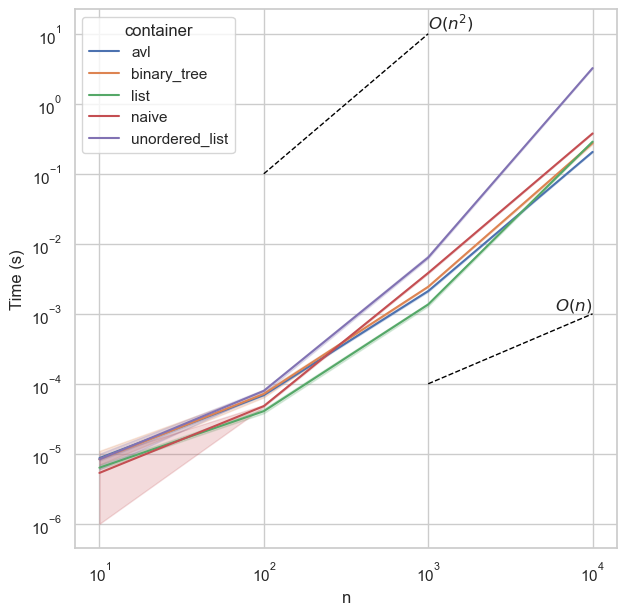

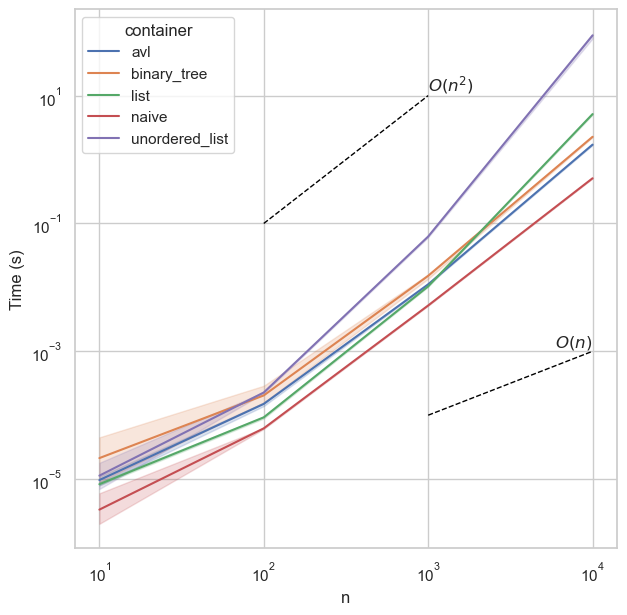

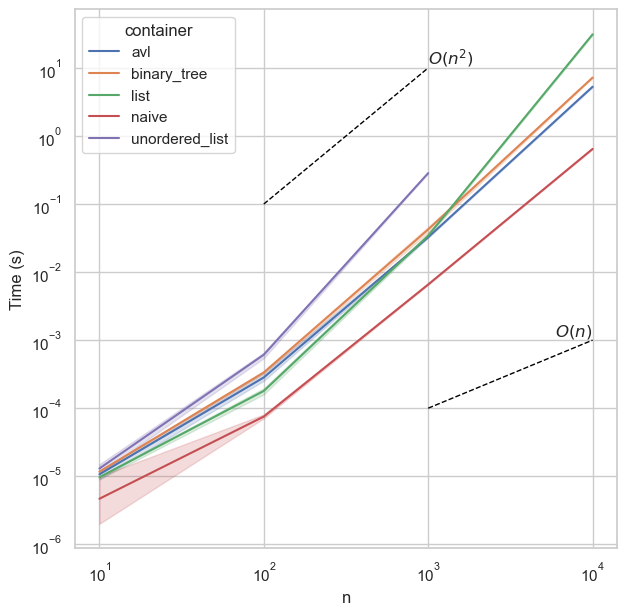

In [25]:
for length, name in zip([0.1, 0.3, 0.6], ["small", "medium", "big"]):
    fig, ax = plt.subplots(1,1, figsize=(7,7))
    sns.lineplot(data=df_random[(df_random.event_container=="heap") & (df_random.length == length)], x="n", y="time", hue="container", ax=ax)

    ax.set(xscale="log", yscale="log")
    ax.set_ylabel("Time (s)")

    y = 1e-1
    xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*2)]
    ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
    ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

    y = 1e-4
    xs = [1000, 10000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*1)]
    ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
    ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom", horizontalalignment="right")

    plt.savefig(f"./tex/figs/tempos/plot_random_{name}_time.pdf")
    plt.show()


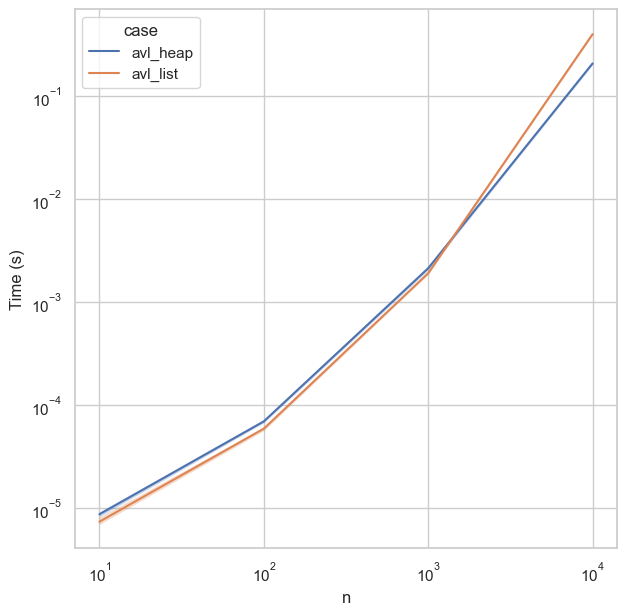

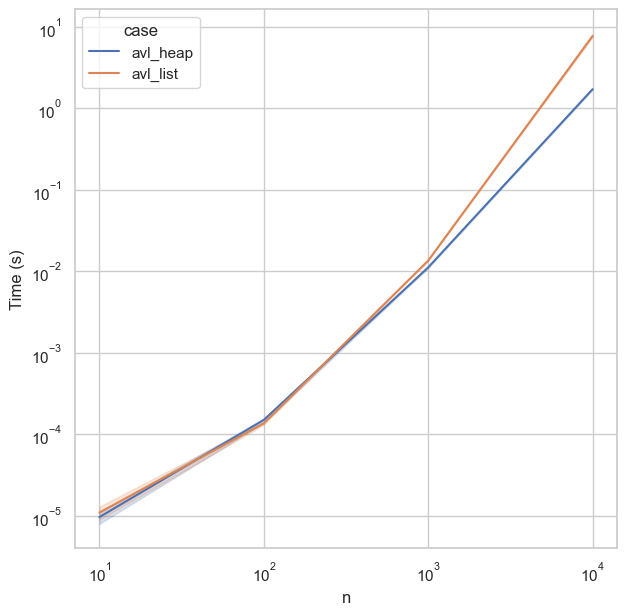

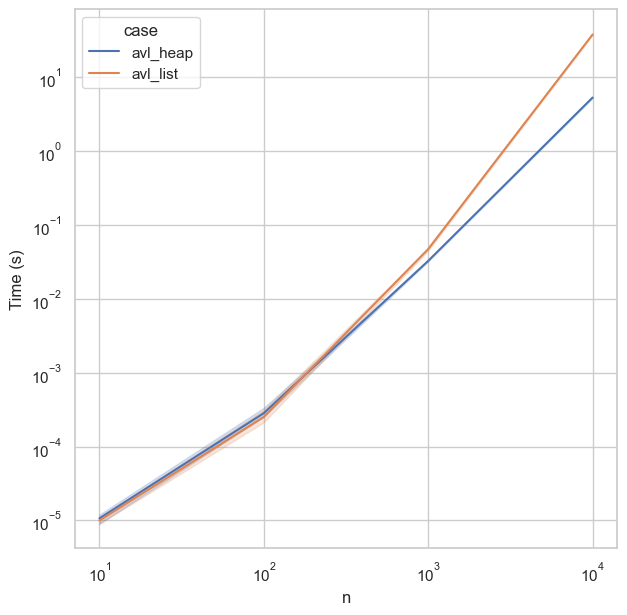

In [26]:
for length, name in zip([0.1, 0.3, 0.6], ["small", "medium", "big"]):
    fig, ax = plt.subplots(1,1, figsize=(7,7))
    sns.lineplot(data=df_random[(df_random.container.isin(["avl"])) & (df_random.length == length)], x="n", y="time", hue="case", ax=ax)

    ax.set(xscale="log", yscale="log")
    ax.set_ylabel("Time (s)")


    plt.savefig(f"./tex/figs/tempos/heap_x_list_{name}.pdf")
    plt.show()


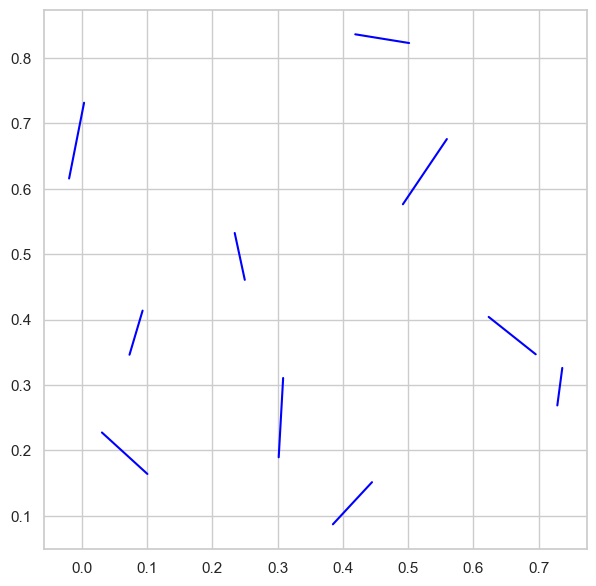

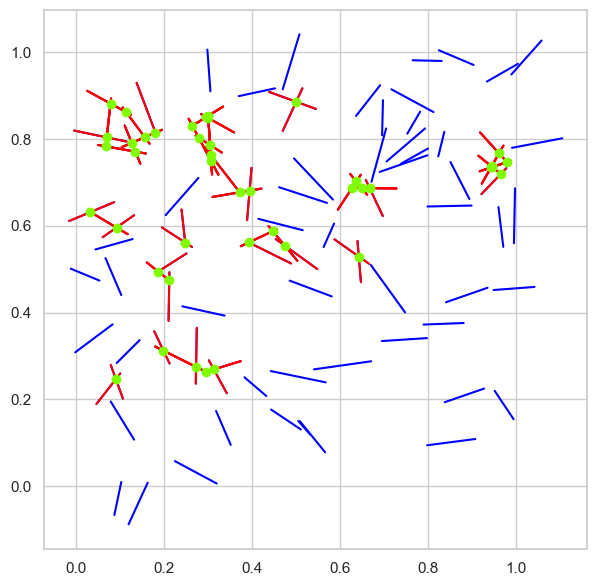

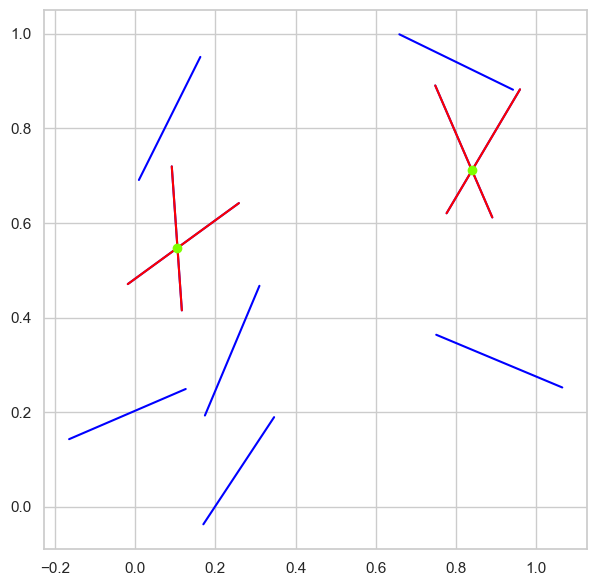

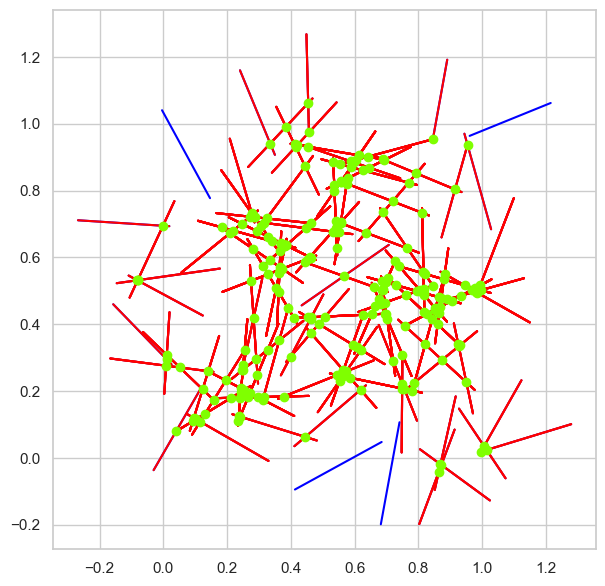

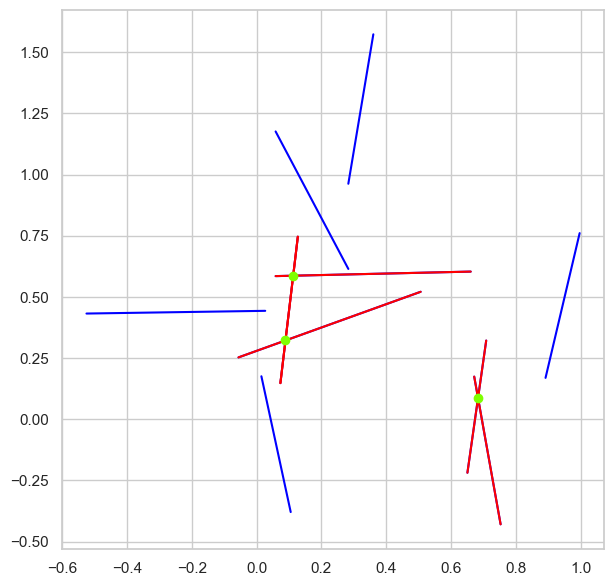

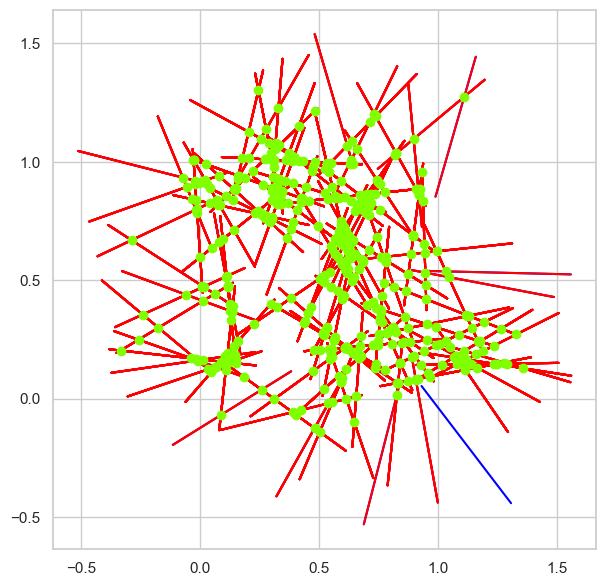

In [37]:
for length in [0.1, 0.3, 0.6]:
    for n in [10, 100]:
        fig, ax = plt.subplots(1, 1, figsize=(7, 7))

        row = df_random[(df_random.length==length) & (df_random.n==n) & (df_random.container=="avl")].iloc[2]

        plot_segments(row.segments, ax, False)
        plt.savefig(f"tex/figs/exemplos/random_example_{length}_{n}_segments.pdf", dpi=300)
        plot_intersections(row.segments, row.intersections, ax=ax)
        plt.savefig(f"tex/figs/exemplos/random_example_{length}_{n}_interserctions.pdf", dpi=300)

        plt.show()

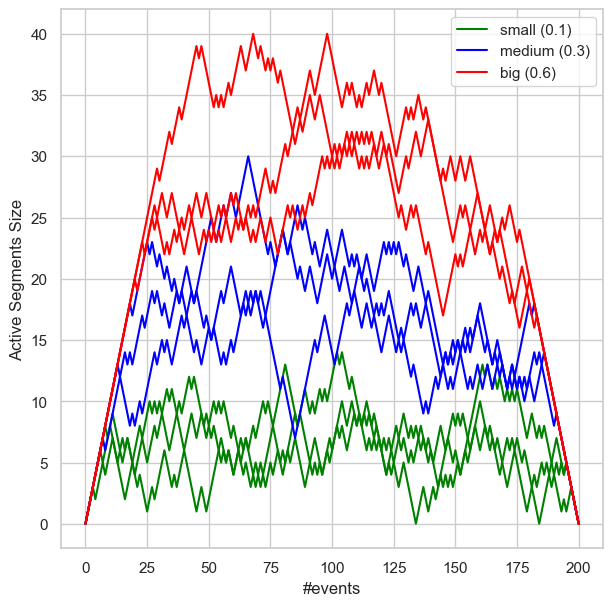

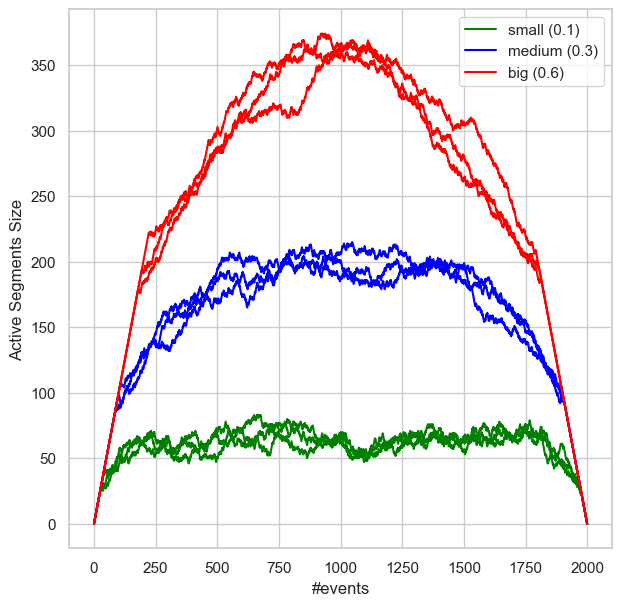

In [31]:
for n in [100, 1000]:
    fig, ax = plt.subplots(1, 1, figsize=(7,7))


    added = False
    for row in df[(df.length ==0.1) & (df.n == n) &(df.sort_case=="random_points") & (df.event_container=="heap") & (df.container=="list")].iterrows():
        ax.plot(row[1]['active_elements_size'], color="green", label="small (0.1)" if not added else None)
        added = True

    added = False
    for row in df[(df.length ==0.3) & (df.n == n) &(df.sort_case=="random_points") & (df.event_container=="heap") & (df.container=="list")].iterrows():
        ax.plot(row[1]['active_elements_size'], color="blue", label="medium (0.3)" if not added else None)
        added = True

    added = False
    for row in df[(df.length ==0.6) & (df.n == n) &(df.sort_case=="random_points") & (df.event_container=="heap") & (df.container=="list")].iterrows():
        ax.plot(row[1]['active_elements_size'], color="red", label="big (0.6)" if not added else None)
        added = True

    ax.legend()
    ax.set_xlabel("#events")
    ax.set_ylabel("Active Segments Size")

    plt.savefig(f"./tex/figs/ativos/active_segments_size_{n}.pdf", bbox_inches="tight")

# Aumento das interseções

In [35]:
df_inter = read_jsons(["../build/semana06/plot_nintersects/"])

../build/semana06/plot_nintersects/random_naive__0.1_10000_1.json
../build/semana06/plot_nintersects/random_naive__0.1_10000_2.json
../build/semana06/plot_nintersects/random_naive__0.1_10000_3.json
../build/semana06/plot_nintersects/random_naive__0.1_10000_4.json
../build/semana06/plot_nintersects/random_naive__0.1_10000_5.json
../build/semana06/plot_nintersects/random_naive__0.1_1000_1.json
../build/semana06/plot_nintersects/random_naive__0.1_1000_2.json
../build/semana06/plot_nintersects/random_naive__0.1_1000_3.json
../build/semana06/plot_nintersects/random_naive__0.1_1000_4.json
../build/semana06/plot_nintersects/random_naive__0.1_1000_5.json
../build/semana06/plot_nintersects/random_naive__0.1_100_1.json
../build/semana06/plot_nintersects/random_naive__0.1_100_2.json
../build/semana06/plot_nintersects/random_naive__0.1_100_3.json
../build/semana06/plot_nintersects/random_naive__0.1_100_4.json
../build/semana06/plot_nintersects/random_naive__0.1_100_5.json
../build/semana06/plot_ni

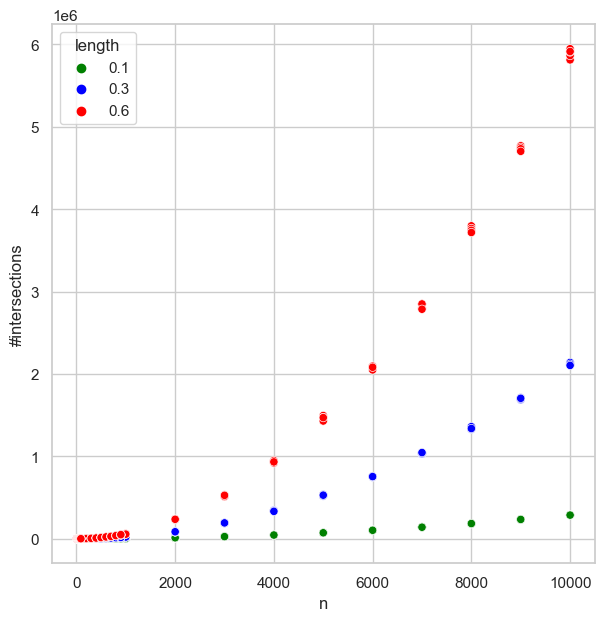

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
sns.scatterplot(data=df_inter[df_inter.n_intersections > 0], x="n", y="n_intersections", ax=ax, hue="length", palette=["green", "blue", "red"])

ax.set_ylabel("#intersections")
plt.savefig("tex/figs/exemplos/n_intersections.pdf", bbox_inches="tight")


plt.show()
plt.close()

FileNotFoundError: [Errno 2] No such file or directory: 'tex/figs/examples/n_intersections_log.pdf'

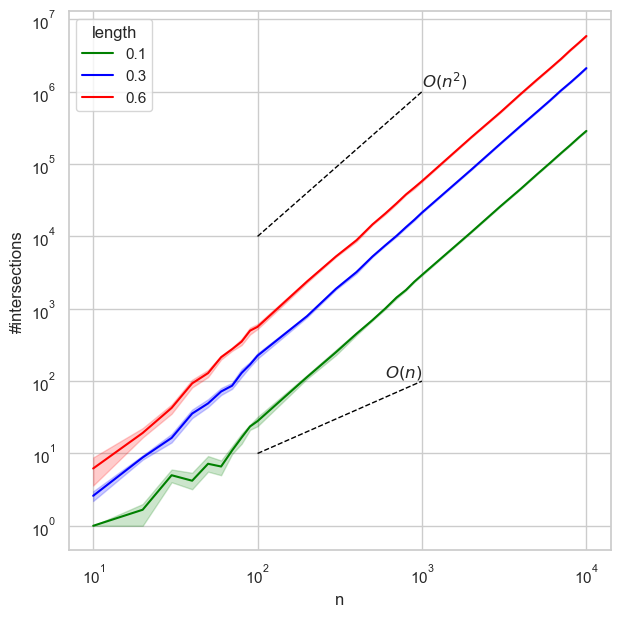

In [43]:

fig, ax = plt.subplots(1, 1, figsize=(7,7))
sns.lineplot(data=df_inter[df_inter.n_intersections > 0], x="n", y="n_intersections", ax=ax, hue="length", palette=["green", "blue", "red"])

ax.set(xscale="log", yscale="log")

y = 10000
xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*2)]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

y = 10
xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*1)]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom", horizontalalignment="right")

ax.set_ylabel("#intersections")

plt.savefig("tex/figs/exemplos/n_intersections_log.pdf", bbox_inches="tight")
plt.show()
plt.close()